# OverView:

- Load file into pandas DataFrame
- Add Labels to DF
- Select data to scatter plot
- plot data as scatter
- Select data to histogram plot
- plot data as histogram
- select data to contour plot
- plot data as contour plot
- 2D Histogram select data
- 2D Histogram Plot
- export plots?

------------------------------------
## Details of implementation
Load file to DF:
- pandas function to load: read_table
-- seperator is any whitespace

Add Labels:
- declare labels
- clean labels
- assign to DF

Select data to scatter plot:
- pull SSFR and M* from df (by column name)
- perhaps calculate SSFR if needed
- log SSFR vs log M*


Plot Scatter Plot:
- choose scale
- axis labels
- color variations for some thrid value?
- title label
- input data
- pyplot.show()

Select data to histogram plot
 - pull SSFR from df (by column name)
 - log SSFR [SSFR = SFR / M*] {where SFR and M* are not logged when you take the ratio!}

Plot Histogram:


contour plot: - 2 dimensional histogram
- x log(m*)
- y log(sfr)
- z = ? (frequency?)

twoDHist select
- SSRF and m*

# Code below

In [1]:
# imports tools for use
import pandas as pd
import numpy as np
from pprint import pprint # for debugging and looking at lists in a pretty way means "pretty print"
from matplotlib import pyplot as plt
import math

- This data set's file location is expected to be in the same file location as this .ipynb file. 
- From http://pages.iu.edu/~salims/gswlc/GSWLC-M2.dat.gz
- Once downloaded, remove the .gz file type from the file (On Mac: right click on file; click more info; click name section; delete; all done)
- Move file to this folder where this project is located.

In [2]:
# Load file into pandas DataFrame
fileName = "./GSWLC-M2.dat"
astroDF = pd.read_table(fileName, sep="\s+")
pprint(astroDF)

        1237645942905634957                  -99  1242  52901  461  \
0       1237645942905634975                  -99  1242  52901  479   
1       1237645942905635004  3786262985749565412  1242  52901  487   
2       1237645942905700478  3786262985749565371  1242  52901  491   
3       1237645942905700561                  -99  1242  52901  493   
4       1237645942905831669                  -99  1242  52901  546   
...                     ...                  ...   ...    ...  ...   
361322  1237680303173141243  4473835985310846807  5953  56092  136   
361323  1237680296736522605  4480556200379814459  5026  55855  804   
361324  1237680099702276280  6485115431195518114  4273  55506  188   
361325  1237680306396004407                  -99  5951  56102  190   
361326  1237680306931106409  4473835985310843880  5949  56096  668   

         57.442293   0.158853  0.1593  0.90  11.563  ...  0.690  0.240  0.105  \
0        57.452672   0.044341  0.1351  2.26  10.763  ...  0.978  0.760  0.142 

In [3]:
#Add Labels: - declare labels

# labels come from https://salims.pages.iu.edu/gswlc/table2.pdf

# some labels copy poorly due to non-standard character usage in the document

# changes 21 UV survey to 21 UV_survey and 5 fiber ID to 5 fiber_ID manually to make the process of cleaning much easier
# changes multi-line phrases entries to single line entries manually to make for easier cleaning
# changes line 11 and 12 to be log_SFRSED
# changes line 19 (AV ) to (AV)


mTwoLabels="""1 ObjID SDSS photometric identification number
2 GLXID GALEX photometric identification number
3 plate SDSS spectroscopic plate number
4 MJD SDSS spectroscopic plate date
5 fiber_ID SDSS spectroscopic fiber identification number
6 RA deg Right Ascension from SDSS
7 Decl. deg Declination from SDSS
8 z Redshift from SDSS
9 2r Reduced goodnes-of-fit value for the SED fitting
10 logM⇤ M Stellar mass
11 (logM⇤) M Error of the stellar mass
12 log_SFRSED Myr-1 UV/optical (SED) star formation rate
13 (log_SFRSED) Myr-1 Error of the SFR
14 AFUV mag Dust attenuation in rest-frame FUV
15 (AFUV) mag Error of dust attenuation in FUV
16 AB mag Dust attenuation in rest-frame B
17 (AB) mag Error of dust attenuation in B
18 AV mag Dust attenuation in rest-frame V
19 (AV) mag Error of dust attenuation in V
20 flag_sed SED fitting flag (0 = OK, 1 = broad-line spectrum, 2 = 2r > 30, 5 = missing SDSS photometry)
21 UV_survey 1 = GSWLC-A, 2 = GSWLC-M, 3 = GSWLC-D
22 flag_uv UV (GALEX) flag (0 = no UV; 1 = FUV only; 2 = NUV only; 3 = both)
23 flag_midir Mid-IR (unWISE) flag (0 = no mid-IR, 1 = LIR based on 12 µm, 2 = LIR based on 22 µm;5 = LIR corrected for mid-IR AGN emission)
24 flag_mgs 0 = not in SDSS Main Galaxy Sample (MGS), 1 = in MGS"""


In [9]:
# Add Labels: - clean labels


def cleanMTwoLabels(mTwoLabels):
    labels = mTwoLabels # stores the passed in labels in a holder variable to prevent changing the original object
    labels = labels.split("\n") # creates a list each entry corresponding to a line
    labelslength = len(labels)
    for index in range(labelslength): # cycles through each index of the the list entries
        label = labels[index] # creates holder variable of a single label entry
        label = label.split(" ") # turns each entry into a list of words
        label = label[1] # uses the second word in the line (the label name)
        labels[index]=label # sets label at this index to the new clean label
    return labels

mTwoCleanLabels = cleanMTwoLabels(mTwoLabels) # stores new list

In [5]:
# Status Check: displays labels
pprint(mTwoCleanLabels)

['ObjID',
 'GLXID',
 'plate',
 'MJD',
 'fiber_ID',
 'RA',
 'Decl.',
 'z',
 '2r',
 'logM⇤',
 '(logM⇤)',
 'log_SFRSED',
 '(log_SFRSED)',
 'AFUV',
 '(AFUV)',
 'AB',
 '(AB)',
 'AV',
 '(AV)',
 'flag_sed',
 'UV_survey',
 'flag_uv',
 'flag_midir',
 'flag_mgs']


In [6]:
# Add Labels: - assign to DF
# TODO: Do the labels need to be shifted left one?
astroDF.columns = mTwoCleanLabels

In [7]:
# Status Check: displays the dataFrame as it is now

print(astroDF)

                      ObjID                GLXID  plate    MJD  fiber_ID  \
0       1237645942905634975                  -99   1242  52901       479   
1       1237645942905635004  3786262985749565412   1242  52901       487   
2       1237645942905700478  3786262985749565371   1242  52901       491   
3       1237645942905700561                  -99   1242  52901       493   
4       1237645942905831669                  -99   1242  52901       546   
...                     ...                  ...    ...    ...       ...   
361322  1237680303173141243  4473835985310846807   5953  56092       136   
361323  1237680296736522605  4480556200379814459   5026  55855       804   
361324  1237680099702276280  6485115431195518114   4273  55506       188   
361325  1237680306396004407                  -99   5951  56102       190   
361326  1237680306931106409  4473835985310843880   5949  56096       668   

                RA      Decl.       z    2r   logM⇤  ...  (AFUV)     AB  \
0        57.

In [11]:
# Select data to plot in scatter plot:

mStarList = astroDF.loc[:,'logM⇤'].tolist()
ScatterSRF = astroDF.loc[:,'log_SFRSED'].tolist()
def getSSRFList(ScatterX,  ScatterSRF):
    SSRFList = []
    for index in range(len(ScatterSRF)):
        iM = ScatterX[index]
        iSRF = ScatterSRF[index]
        iSSRF = iSRF/iM
        # if needed can take log of SSRF here
        SSRFList.append(iSSRF)
    return SSRFList


# assigns values to x, y
ScatterX = mStarList
ScatterY = getSSRFList(ScatterX,  ScatterSRF)


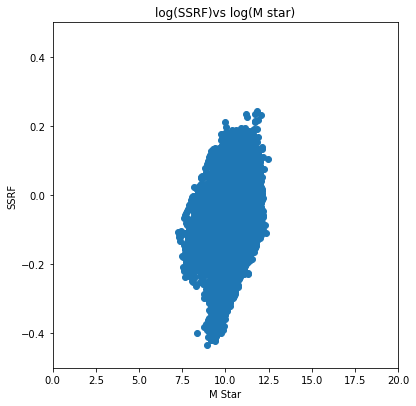

In [12]:
# plot scatter data
# TODO: remove outliers or shift frame of view
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([.13, .3, .6, .6])
ax.scatter(ScatterX, ScatterY)
plt.xlabel('M Star')
plt.ylabel('SSRF')
plt.title('log(SSRF)vs log(M star)')
ax.set_xlim((0, 20))
ax.set_ylim((-0.5, 0.5))
plt.show()

In [13]:
# Select data to plot in Histogram plot:

HistX = astroDF.loc[:,'log_SFRSED'].tolist()


In [14]:
# Select data to plot in Contour plot:
#TODO: :which data are we using for the Z value?
#TODO: input y needs to be in a 2d array (it's values are outputs of z(x,y))
contourX = astroDF.loc[:,'logM⇤'].tolist()
contourY = astroDF.loc[:,'log_SFRSED'].tolist()
contourZ = astroDF.loc[:,'AFUV'].tolist()

In [16]:
# # plot contour plot
# levels = 25
# cmap=''
# plt.ylabel('')
# plt.contour(contourX, contourY, contourZ, levels=levels)#adds cmap for colors

In [17]:
# Select data to plot in Contour plot:
#TODO: :which data are we using for the Z value?

hist2dX = astroDF.loc[:,'logM⇤'].tolist()
hist2dY = astroDF.loc[:,'log_SFRSED'].tolist()

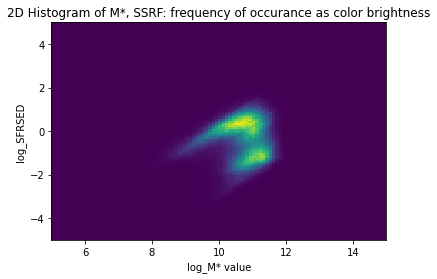

In [18]:
bins = 100
rng = [[5, 15], [-5, 5]]#[[xmin=0, xmax=20], [ymin=0, ymax=20]]
plt.hist2d(x=hist2dX, y=hist2dY, bins=bins, range=rng)
plt.xlabel('log_M* value')
plt.ylabel('log_SFRSED')
plt.title('2D Histogram of M*, SSRF: frequency of occurance as color brightness')
plt.show()